In [1]:
# import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

In [4]:
# input dataset
data= pd.read_csv('.../diabetes.csv')
print('Shape:', data.shape)
print(data.isnull().sum())

Shape: (768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Make a more simple name columns
new_col = {'Pregnancies': 'preg', 'Glucose': 'gluc', 'BloodPressure': 'pres', 'SkinThickness':'skin', 'Insulin':'insu', 'BMI':'bmi', 'DiabetesPedigreeFunction':'dbpf', 'Age':'age', 'Outcome':'out'}

In [10]:
data.rename(columns = new_col, inplace = True)
data.head()

,preg,gluc,pres,skin,insu,bmi,dbpf,age,out
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Input Variales (X)
1. preg : Number of times pregnant
2. gluc : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres : Diastolic blood pressure (mm Hg)
4. skin : Triceps skin fold thickness (mm)
5. insu : 2-Hour serum insulin (mu U/ml)
6. bmi : Body mass index (weight in kg/(height in m)^2)
7. dbpf : Diabetes pedigree function
8. age : Age (years)

### Target Variable (Y): 
out : Target variable. 0 represent an individual who does not have diabetes and 1 represent an individual who has diabetes.

### Handling missing value 
If we see the null values above we didn't get a missing value but after check the head data I found that there are some 0 values in some variables. so, in this case, I define the missing value in this dataset are 0 in all columns except the output (of course cuz the output 0 mean that the patient don't have diabetes).\
So I will replacing 0 as NaN value in all columns except output. 

In [11]:
data[['preg','gluc', 'pres', 'skin', 'insu', 'bmi', 'dbpf', 'age']] = data[['preg','gluc', 'pres', 'skin', 'insu', 'bmi', 'dbpf', 'age']].replace(0,np.NaN)

In [12]:
# Check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    657 non-null    float64
 1   gluc    763 non-null    float64
 2   pres    733 non-null    float64
 3   skin    541 non-null    float64
 4   insu    394 non-null    float64
 5   bmi     757 non-null    float64
 6   dbpf    768 non-null    float64
 7   age     768 non-null    int64  
 8   out     768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### Replacing Missing Value 

There are 6 columns got missing value, for insulin column we have a half of data are missing values. Since the data are numeric values, the missing values can be replaced with some numerical values. For simple step, the missing values can be handle by just dropping the nan values, but it will reduce data by a lot. So I will handle the missing values with step by step per columns. 

**preg**

In [13]:
print('Missing Values in Pregnancies columns:', data['preg'].isnull().sum())

Missing Values in Pregnancies columns: 111


We have 111 missing values in Pregnancies columns, I will replace the missing values by the mean based on their output. 

In [15]:
preg_rep = data[data['preg'].notnull()]
preg_rep = preg_rep[['preg', 'out']].groupby(['out'])[['preg']].mean().apply(np.ceil).reset_index()
print(preg_rep)

   out  preg
0    0   4.0
1    1   6.0


In [16]:
# Replace the missing value in Pregnancies column
data.loc[(data['out'] == 0 ) & (data['preg'].isnull()), 'preg'] = 4
data.loc[(data['out'] == 1 ) & (data['preg'].isnull()), 'preg'] = 6
print('Missing Values in Pregnancies columns:', data['preg'].isnull().sum())

Missing Values in Pregnancies columns: 0


**Gluc**

In [17]:
print('Missing Values in Glucose columns:', data['gluc'].isnull().sum())

Missing Values in Glucose columns: 5


In [18]:
# Replace Missing values in glucose column by mean
data['gluc'].fillna(data['gluc'].mean(), inplace= True)
print('Missing Values in Glucose columns:', data['gluc'].isnull().sum())

Missing Values in Glucose columns: 0


**Pres**

In [19]:
print('Missing Values in BloodPressure columns:', data['pres'].isnull().sum())

Missing Values in BloodPressure columns: 35


In [20]:
# Replace Missing values in BloodPressure column by median
data['pres'].fillna(data['pres'].median(), inplace= True)
print('Missing Values in BloodPressure columns:', data['pres'].isnull().sum())

Missing Values in BloodPressure columns: 0


**Skin**

In [21]:
print('Missing Values in SkinThickness columns:', data['skin'].isnull().sum())

Missing Values in SkinThickness columns: 227


For SkinThickness i will replace the missing values by the median based on their output. 

In [22]:
skin_rep = data[data['skin'].notnull()]
skin_rep = skin_rep[['skin', 'out']].groupby(['out'])[['skin']].median().reset_index()
print(skin_rep)

   out  skin
0    0  27.0
1    1  32.0


In [23]:
# Replace the missing value in SkinThickness column
data.loc[(data['out'] == 0 ) & (data['skin'].isnull()), 'skin'] = 27
data.loc[(data['out'] == 1 ) & (data['skin'].isnull()), 'skin'] = 32
print('Missing Values in SkinThickness columns:', data['skin'].isnull().sum())

Missing Values in SkinThickness columns: 0


**Insu**

In [24]:
print('Missing Values in Insulin columns:', data['insu'].isnull().sum())

Missing Values in Insulin columns: 374


Same as skinthickness i will replace the missing values in insulin column by mean based on their output.

In [25]:
insu_rep = data[data['insu'].notnull()]
insu_rep = insu_rep[['insu', 'out']].groupby(['out'])[['insu']].mean().apply(np.ceil).reset_index()
print(insu_rep)

   out   insu
0    0  131.0
1    1  207.0


In [26]:
# Replace the missing value in Insulin column
data.loc[(data['out'] == 0 ) & (data['insu'].isnull()), 'insu'] = 131
data.loc[(data['out'] == 1 ) & (data['insu'].isnull()), 'insu'] = 207
print('Missing Values in Insulin columns:', data['insu'].isnull().sum())

Missing Values in Insulin columns: 0


**bmi**

In [27]:
print('Missing Values in BMI columns:', data['bmi'].isnull().sum())

Missing Values in BMI columns: 11


In [28]:
# Replace missing values in BMI column by mean
data['bmi'].fillna(data['bmi'].mean(), inplace= True)
print('Missing Values in BMI columns:', data['bmi'].isnull().sum())

Missing Values in BMI columns: 0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   gluc    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   bmi     768 non-null    float64
 6   dbpf    768 non-null    float64
 7   age     768 non-null    int64  
 8   out     768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


Now we have a full dataset without missing values. Let's explore the dataset.

### Data Exploration 

In [30]:
data['out'].value_counts()

0    500
1    268
Name: out, dtype: int64

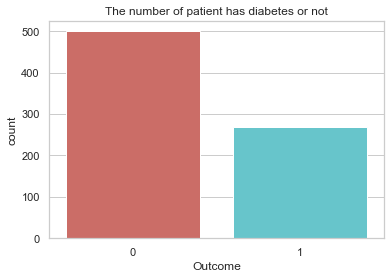

In [31]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='out', data= data, palette ='hls')
plt.title('The number of patient has diabetes or not')
plt.xlabel('Outcome')
plt.show()

There are 500 sample patient with 0 values output, it means that the patient doesn't have diabetes, and 268 sample with 1 values output means the patient has diabetes.

In [32]:
data.groupby('out').mean()

,preg,gluc,pres,skin,insu,bmi,dbpf,age
out,,,,,,,,
0,3.882000,110.710121,70.920000,27.170000,130.624000,30.888434,0.429734,31.190000
1,5.716418,142.165573,75.123134,32.671642,206.925373,35.384757,0.550500,37.067164


After groping the data with mean, I can conclude that all variables have a higher mean for data output 1. It means that patient who has positive diabetes have a higher diagnostic value than the patient who hasn't diabetes. 

### Visualization

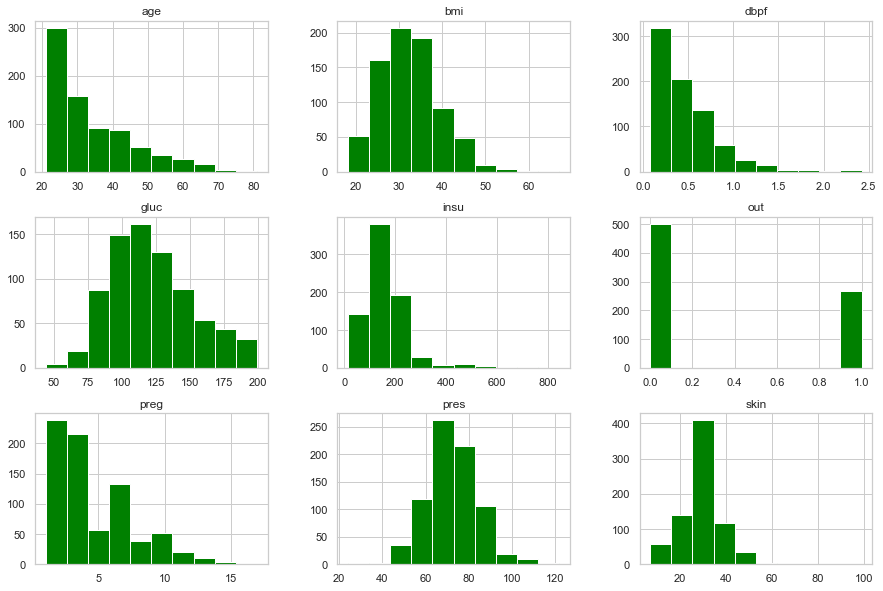

In [33]:
# histogram 
data.hist(color = 'green')
plt.gcf().set_size_inches(15,10)
plt.show()

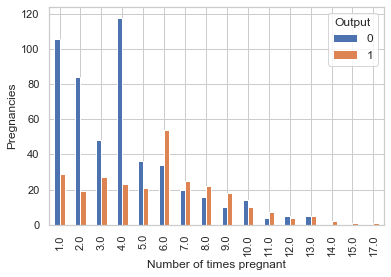

In [38]:
pd.crosstab(data.preg, data.out).plot(kind='bar')
plt.xlabel('Number of times pregnant')
plt.ylabel('Pregnancies')
plt.legend(loc = 'upper right', fontsize=12, title = 'Output')
plt.show()

Based on the histogram above, it seems that the patient with a higher number of pregnancies has a higher chance to got diabetes. 

<Figure size 1080x1080 with 0 Axes>

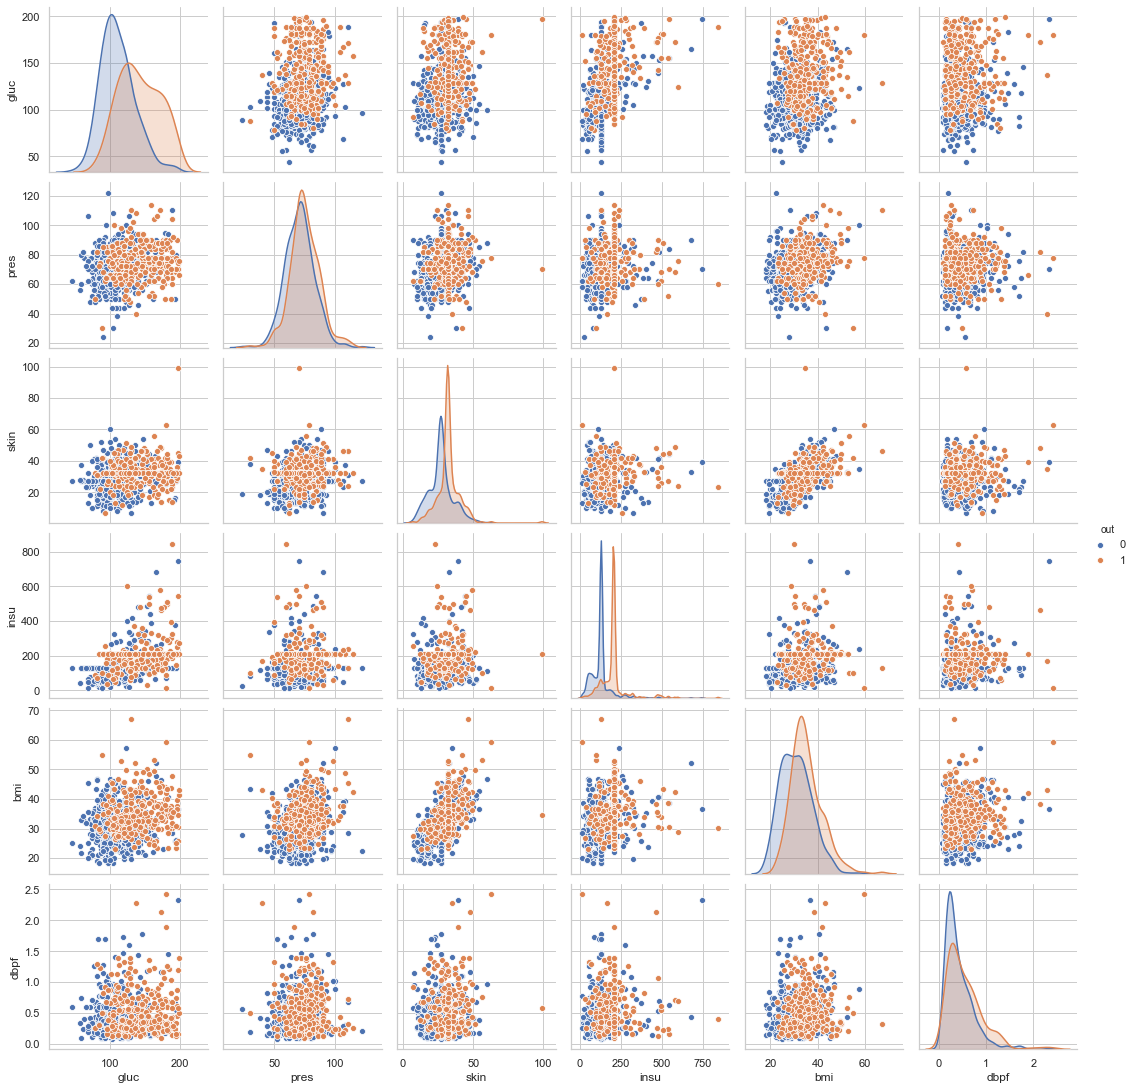

In [39]:
plt.figure(figsize =(15,15))
sns.pairplot(data, vars=['gluc', 'pres', 'skin', 'insu', 'bmi', 'dbpf'], hue = 'out')
plt.show()

**Observation**\
Pairplot gives information that: 
1. High glucose has a higher chance of diabetes. 
2. The higher number of insulin that given to patient indicates that the patient has diabetes.
3. Patient with high skinthickness and high bmi have a higher chance of diabetes. 

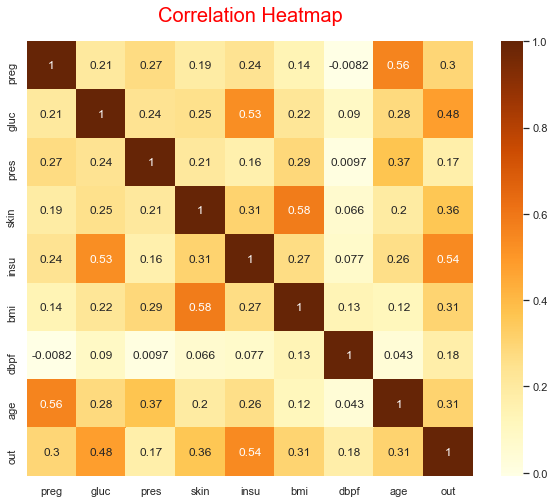

In [44]:
# Correlations heatmap
corr = data.corr(method='spearman')
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(corr, annot = True, cmap = 'YlOrBr')
heatmap.set_title('Correlation Heatmap', pad = 20, fontsize = 20, color = 'red')
plt.show()

### Implement Model

In [45]:
# Set the variable dependent and independent
X = data[['preg','gluc', 'pres', 'skin', 'insu', 'bmi', 'dbpf', 'age']]
y = data['out']

In [46]:
# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 8)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [50]:
# compute the y_pred and accuracy score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:1.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [53]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', conf_matrix)
print('Classification Report: \n', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[111  11]
 [ 27  43]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       122
           1       0.80      0.61      0.69        70

    accuracy                           0.80       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192



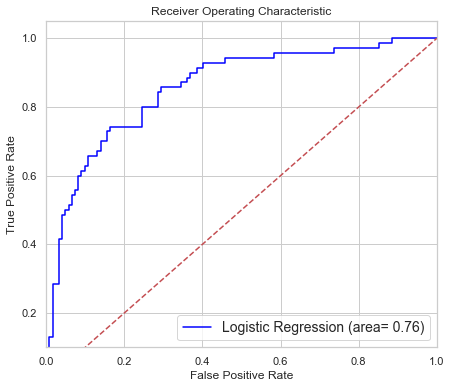

In [58]:
# ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area= %1.2f)' % logit_roc_auc, color = 'blue')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right', fontsize = 14)
plt.show()

### what if I use only the significant variables.

In [59]:
log_model = sm.Logit(y,X)
result = log_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.542336
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    out   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 25 Dec 2020   Pseudo R-squ.:                  0.1615
Time:                        19:19:30   Log-Likelihood:                -416.51
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.572e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.1930      0.034      5.747      0.000       0.127       0.259
gluc           0.0148      0.

The summary gives information that the variable SkinThickness, BMI, DiabetesPedigreeFunction and Age don't significant since the p-values are below 0.05 (in this case I assume the alpha 5%). So I will use Pregnancies, Glucose, BloodPressure and Insulin variables as significant variables. 

In [60]:
A = data[['preg','gluc', 'pres', 'insu']]
b = data['out']

In [62]:
log_model = sm.Logit(b,A)
result = log_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.545975
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.156     
Dependent Variable: out              AIC:              846.6183  
Date:               2020-12-25 19:24 BIC:              865.1935  
No. Observations:   768              Log-Likelihood:   -419.31   
Df Model:           3                LL-Null:          -496.74   
Df Residuals:       764              LLR p-value:      2.3500e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
preg      0.1818     0.0299     6.0873   0.0000    0.1233    0.2403
gluc      0.0151     0.0031     4.8595   0.0000    0.0090 

In [64]:
# Split train test
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size = 0.25, random_state = 8)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(A_train, b_train)

LogisticRegression(solver='liblinear')

In [66]:
b_pred = logreg.predict(A_test)
print('Accuracy of logistic regression classifier on test set: {:1.2f}'.format(logreg.score(A_test, b_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [68]:
# Confusion Matrix
conf_matrix = confusion_matrix(b_test, b_pred)
print('Confusion Matrix: \n', conf_matrix)
print('Classification Report: \n', classification_report(b_test, b_pred))

Confusion Matrix: 
 [[109  13]
 [ 30  40]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.84       122
           1       0.75      0.57      0.65        70

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



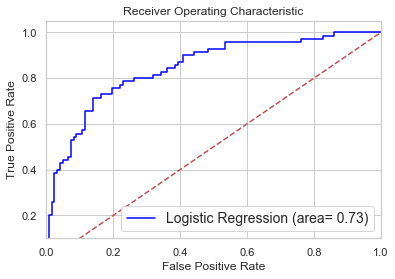

In [72]:
# ROC Curve 
logit_roc_auc = roc_auc_score(b_test, logreg.predict(A_test))
fpr, tpr, thresholds = roc_curve(b_test, logreg.predict_proba(A_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc, color = 'blue')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right', fontsize=14)
plt.show()